In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

sns.set_style("darkgrid")

In [16]:
"""
Update parameters
"""
COLLECTION = "MekaVerse"
ST_DEVS = 3  # set number of st devs away from mean offer
MINT_PRICE = 0.2

"""
Plot params
"""
plt.rcParams.update(
    {
        "figure.facecolor": "white",
        "savefig.facecolor": "white",
        "figure.autolayout": True,
        "figure.figsize": [15, 5],
    }
)


"""
Import pre-reveal sales and bids
"""
bids = pd.read_csv(f"pre-reveal_bids/{COLLECTION}_pre-reveal_bids.csv")
sales = pd.read_csv(f"pre-reveal_sales/{COLLECTION}_pre-reveal_sales.csv")


"""
Helper functions
"""


def get_mean(offers):
    return np.mean(offers)


def get_st_dev(offers):
    return np.std(offers)


def find_anomalous_sale(sale_price, mean, std):
    if sale_price > (mean + ST_DEVS * std):
        return True
    else:
        return False


def percentage_change(col1, col2):
    return ((col2 - col1) / col1) * 100

In [8]:
"""
Print overpaid tokens relative to mean offer price
"""

overpaid_tokens = list()

for token in bids["TOKEN_ID"].unique():
    offers = bids[bids["TOKEN_ID"] == token]["OFFER"]
    if len(offers) > 5:
        mean = get_mean(offers)
        std = get_st_dev(offers)
        if len(sales[sales["TOKEN_ID"] == token]) > 0:
            sale_price = sales[sales["TOKEN_ID"] == token].iloc[0]["PRICE"]
            rank = sales[sales["TOKEN_ID"] == token].iloc[0]["RANK"]
            user = sales[sales["TOKEN_ID"] == token].iloc[0]["USER"]
            if find_anomalous_sale(sale_price, mean, std):
                print(
                    f"Token: {token}, Mean Offer: {mean}, Sale Price: {sale_price}, Rank: {rank}, User: {user}"
                )
                overpaid_tokens.append(token)
        else:
            continue

Token: 1545, Mean Offer: 5.169831801442306, Sale Price: 8.44, Rank: 3655, User: 0x2f7fdc55cf9c62202576bf390fb03d762ac220a1
Token: 1798, Mean Offer: 4.484020833333334, Sale Price: 6.66, Rank: 4895, User: 0x467a44f1d5ac72fea19be7a6680abfaa14f2992a
Token: 174, Mean Offer: 1.3214516129032257, Sale Price: 6.0, Rank: 4864, User: 0xea253aa1737ca26099a169e6310b95ba42cf0a7e
Token: 613, Mean Offer: 3.2540000000000004, Sale Price: 6.799, Rank: 5169, User: 0xa252bc234d2ebd1ba545dd46002b15915ae835d2


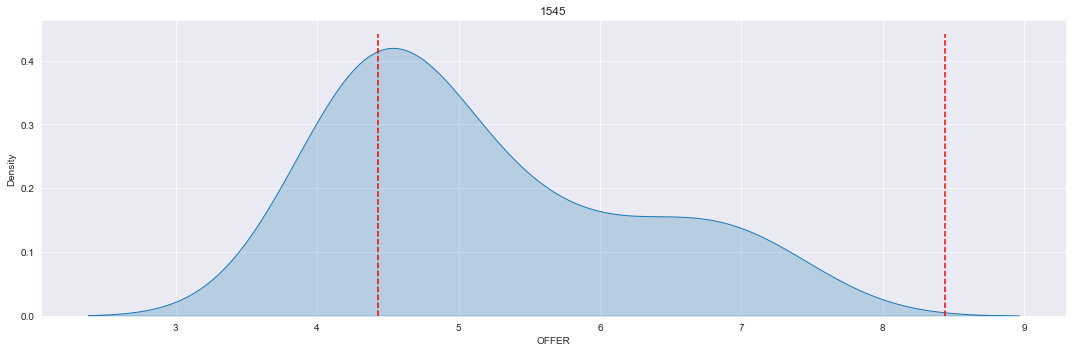

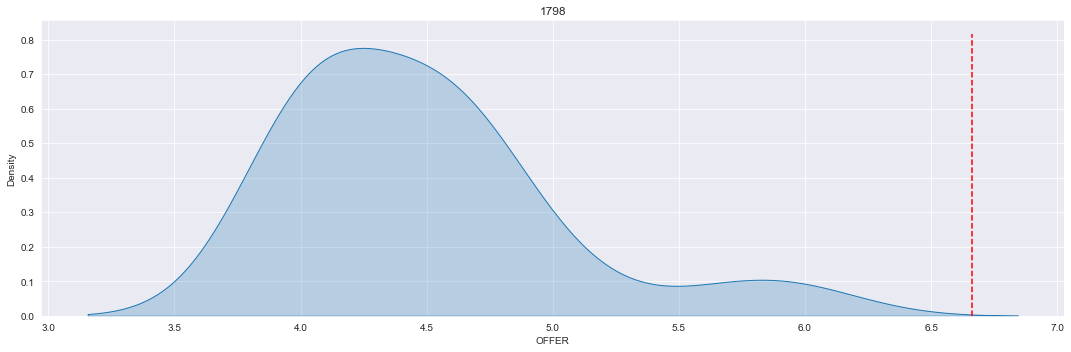

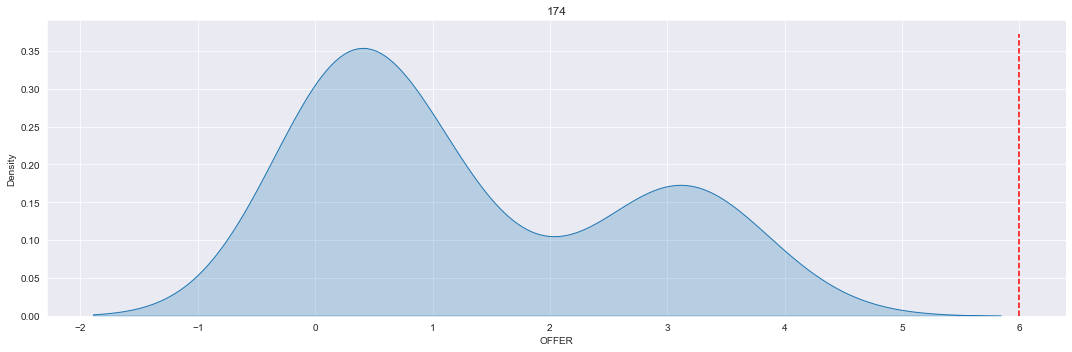

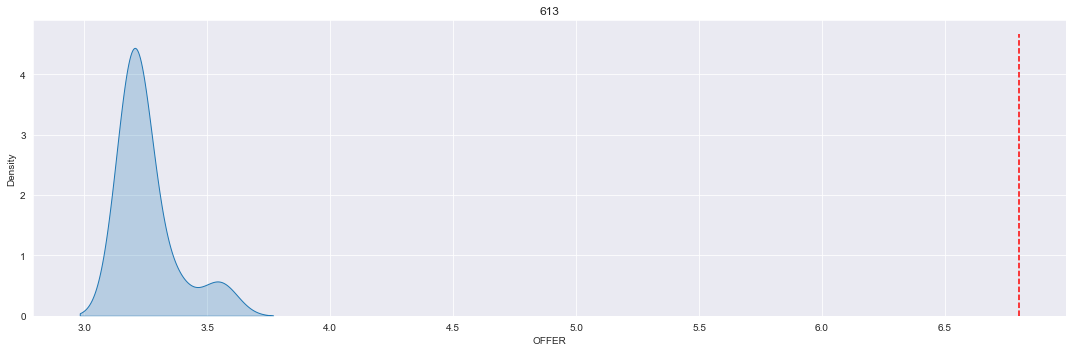

In [4]:
"""
Show distribution of offers and sale prices
"""

for token in overpaid_tokens:

    token_bids = bids[bids["TOKEN_ID"] == token].copy()
    token_sales = sales[sales["TOKEN_ID"] == token].copy()

    ax = sns.kdeplot(token_bids["OFFER"], fill=True)

    xmin, xmax, ymin, ymax = plt.axis()

    for index, row in token_sales.iterrows():
        plt.plot(
            [row["PRICE"], row["PRICE"]],
            [0, ymax],
            "r",
            label="SALE PRICE",
            linestyle="dashed",
        )

    plt.title(token)
    plt.show()

In [22]:
"""
Show offers that are significantly above mint price
"""

bids["MINT"] = MINT_PRICE
bids["OVER_MINT_PERC"] = percentage_change(bids["MINT"], bids["OFFER"])
bids.sort_values(by="OVER_MINT_PERC", ascending=False, inplace=True)
bids.head(40)

,Unnamed: 0,TOKEN_ID,USER,OFFER,DATE,RANK,MINT,OVER_MINT_PERC
843,843,1537,0x6b3205edec4db12a337eb8cda07e8bd1ac05bf46,8.200000,2021-10-10T14:08:49.942530,4106,0.2,4000.000000
1051,1051,197,0x85e2bd74a2f987fa93204c51a5b848039240d41a,7.800000,2021-10-10T05:38:45.246644,4421,0.2,3800.000000
847,847,1497,0x3896e573f5ed623876a4f98551a61daf3862f6f4,7.607249,2021-10-10T14:05:47.821228,5655,0.2,3703.624449
1013,1013,6309,0x39d0792ad8a277af90b91c32eabc2aef37f8c151,7.560000,2021-10-10T08:05:41.814990,6985,0.2,3680.000000
1048,1048,197,0x85e2bd74a2f987fa93204c51a5b848039240d41a,7.536900,2021-10-10T05:49:43.465671,4421,0.2,3668.450000
1100,1100,1545,0x86eaa58f41ba0437498581ce9eda504ba6cf5ab9,7.350000,2021-10-10T02:53:07.518731,3655,0.2,3575.000000
867,867,1497,0xaeb3fea566c8bcb7ae6826a03f818d9d386169ba,7.244999,2021-10-10T13:40:34.910681,5655,0.2,3522.499475
990,990,2019,0xb4cfb411252a80b35b6b73737ff11f510d0f5928,7.244000,2021-10-10T08:49:43.536124,242,0.2,3522.000000
1113,1113,6309,0x9a8b7ad7c7bc8502c0e31547de03ba864a444c1a,7.200000,2021-10-10T02:20:52.100388,6985,0.2,3500.000000
1064,1064,6844,0x9a8b7ad7c7bc8502c0e31547de03ba864a444c1a,7.200000,2021-10-10T04:55:47.269648,3375,0.2,3500.000000
